## Observations and Insights 

In [343]:
%matplotlib notebook

In [344]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_rpt_df = pd.merge(mouse_metadata,study_results,how='outer', on='Mouse ID')

# Display the data table for preview
mouse_rpt_df.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,12.814580,25.662441,19.572108,50.448381,1.021659
std,7.189592,3.921622,14.079460,8.894722,1.137974
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.951474,1.000000
75%,20.000000,29.000000,30.000000,56.292200,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


In [297]:
# Checking the number of mice.
num_mice = mouse_rpt_df.drop_duplicates('Mouse ID')['Mouse ID'].count()
print("Total number of mice in study: " + str(num_mice))

Total number of mice in study: 249


In [298]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_rpt_df['Duplicate'] = mouse_rpt_df.duplicated(['Mouse ID','Timepoint'])
dup_mouse = mouse_rpt_df[mouse_rpt_df['Duplicate']
                          ==True].drop_duplicates(['Mouse ID'])

dup_mouseid = dup_mouse['Mouse ID'].tolist()

print("Mouse ID: " + str(dup_mouseid))
print("Shows up as a duplicate for Mouse ID and Timepoint")

Mouse ID: ['g989']
Shows up as a duplicate for Mouse ID and Timepoint


In [299]:
# Optional: Get all the data for the duplicate mouse ID. 
lsdup_mouse = mouse_rpt_df.loc[mouse_rpt_df['Duplicate']==True]
lsdup_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicate
909,g989,Propriva,Female,21,26,0,45.000000,0,True
911,g989,Propriva,Female,21,26,5,47.570392,0,True
913,g989,Propriva,Female,21,26,10,49.880528,0,True
915,g989,Propriva,Female,21,26,15,53.442020,0,True
917,g989,Propriva,Female,21,26,20,54.657650,1,True


In [300]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mousend_rpt_df = mouse_rpt_df.set_index('Mouse ID').drop(labels=dup_mouseid)
mousend_rpt_df

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicate
Mouse ID,,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0,False
k403,Ramicane,Male,21,16,5,38.825898,0,False
k403,Ramicane,Male,21,16,10,35.014271,1,False
k403,Ramicane,Male,21,16,15,34.223992,1,False
k403,Ramicane,Male,21,16,20,32.997729,1,False
...,...,...,...,...,...,...,...,...
z969,Naftisol,Male,9,30,25,63.145652,2,False
z969,Naftisol,Male,9,30,30,65.841013,3,False
z969,Naftisol,Male,9,30,35,69.176246,4,False


In [301]:
# Checking the number of mice in the clean DataFrame.
cmousend_rpt_df = mousend_rpt_df.reset_index()
cmousend_rpt_df = cmousend_rpt_df.drop(['Duplicate'], axis=1)
num_micend = cmousend_rpt_df.drop_duplicates('Mouse ID')['Mouse ID'].count()
print("Total number of mice in clean DataFrame: " + str(num_micend))

Total number of mice in clean DataFrame: 248


## Summary Statistics

In [302]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
cmousend_rpt_df.agg({'Tumor Volume (mm3)': ['mean','median','var','std','sem']})
# This method is the most straighforward, creating multiple series and putting them all together at the end.


,Tumor Volume (mm3)
mean,50.435293
median,48.933454
var,79.462907
std,8.914197
sem,0.205591


In [303]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function
cmousend_rpt_df.groupby(['Drug Regimen']).agg({
    'Tumor Volume (mm3)': ['mean','median','var','std','sem']})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<IPython.core.display.Javascript object>


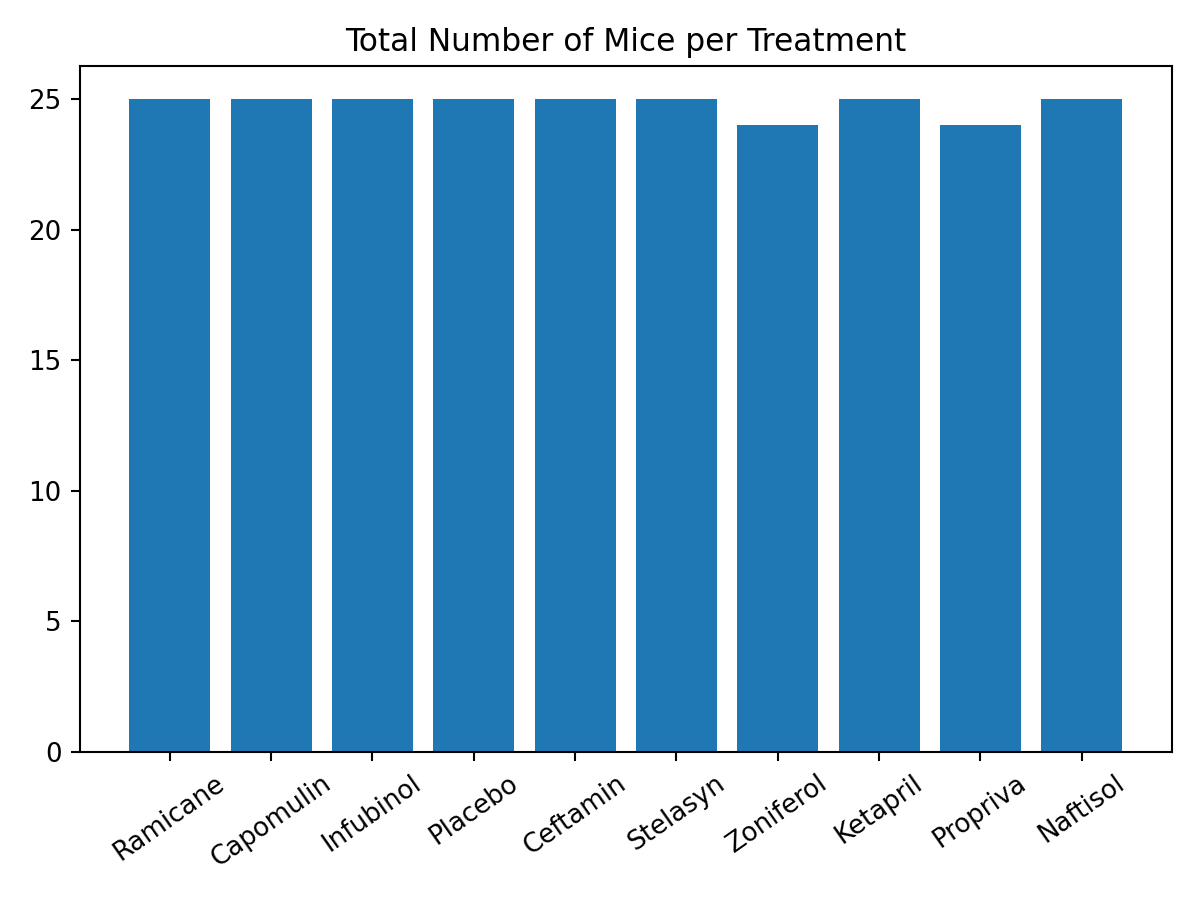

In [329]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. v
treat_ct = len(cmousend_rpt_df.groupby(['Drug Regimen']))
x_axis = np.arange(0,treat_ct,1)
plt.bar(x_axis, cmousend_rpt_df.groupby(['Drug Regimen'])['Mouse ID'].nunique())
plt.xticks(x_axis,cmousend_rpt_df['Drug Regimen'].unique(),rotation=35)
plt.title('Total Number of Mice per Treatment')
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


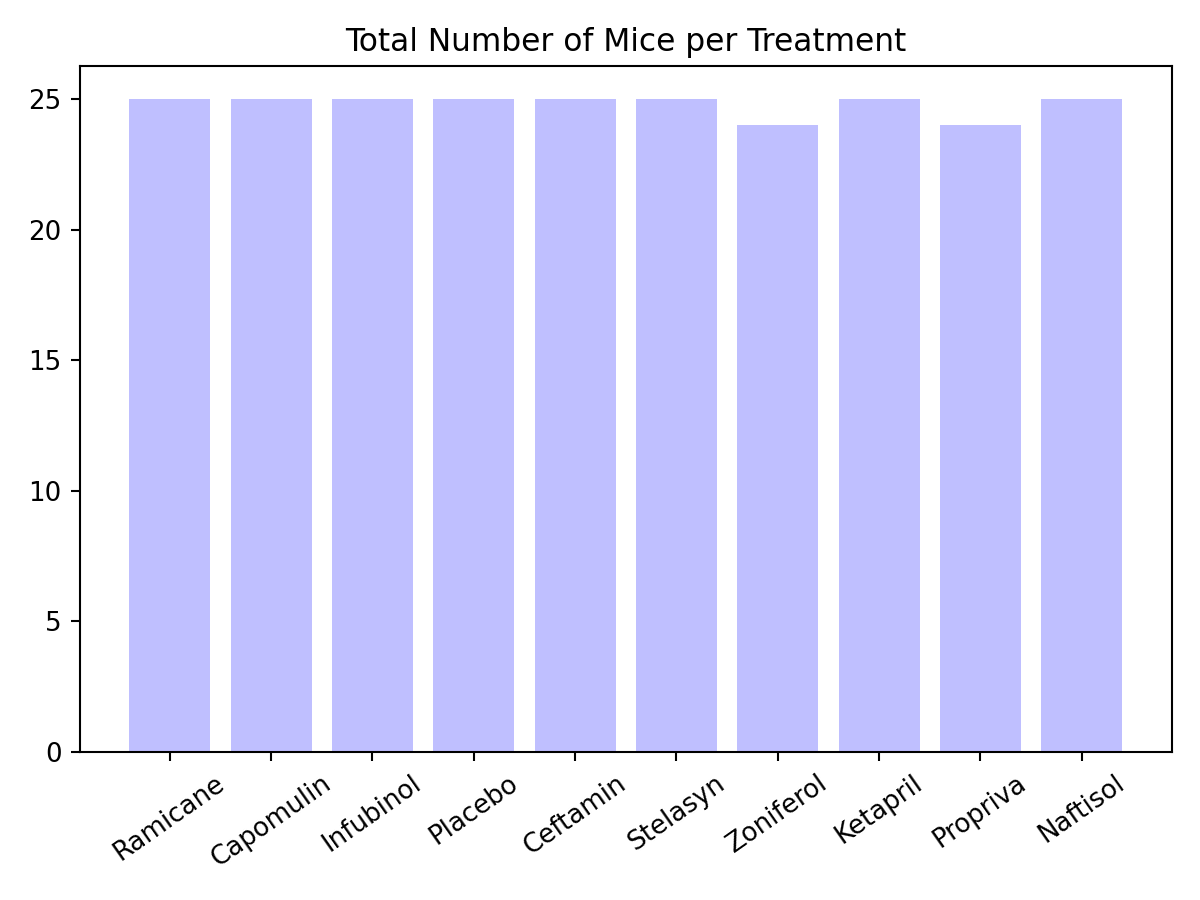

In [374]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
treat_ls = cmousend_rpt_df['Drug Regimen'].unique().tolist()
mice_ls = cmousend_rpt_df.groupby(['Drug Regimen'])['Mouse ID'].nunique().tolist()
x_axis = np.arange(len(mice_ls))
plt.bar(x_axis, mice_ls, color='b', align='center', alpha=0.25)
plt.xticks(x_axis, treat_ls, rotation=35)
plt.title('Total Number of Mice per Treatment')
plt.tight_layout()
plt.show()

In [337]:
# Generate a pie plot showing the distribution of female versus male mice using pandas


<IPython.core.display.Javascript object>


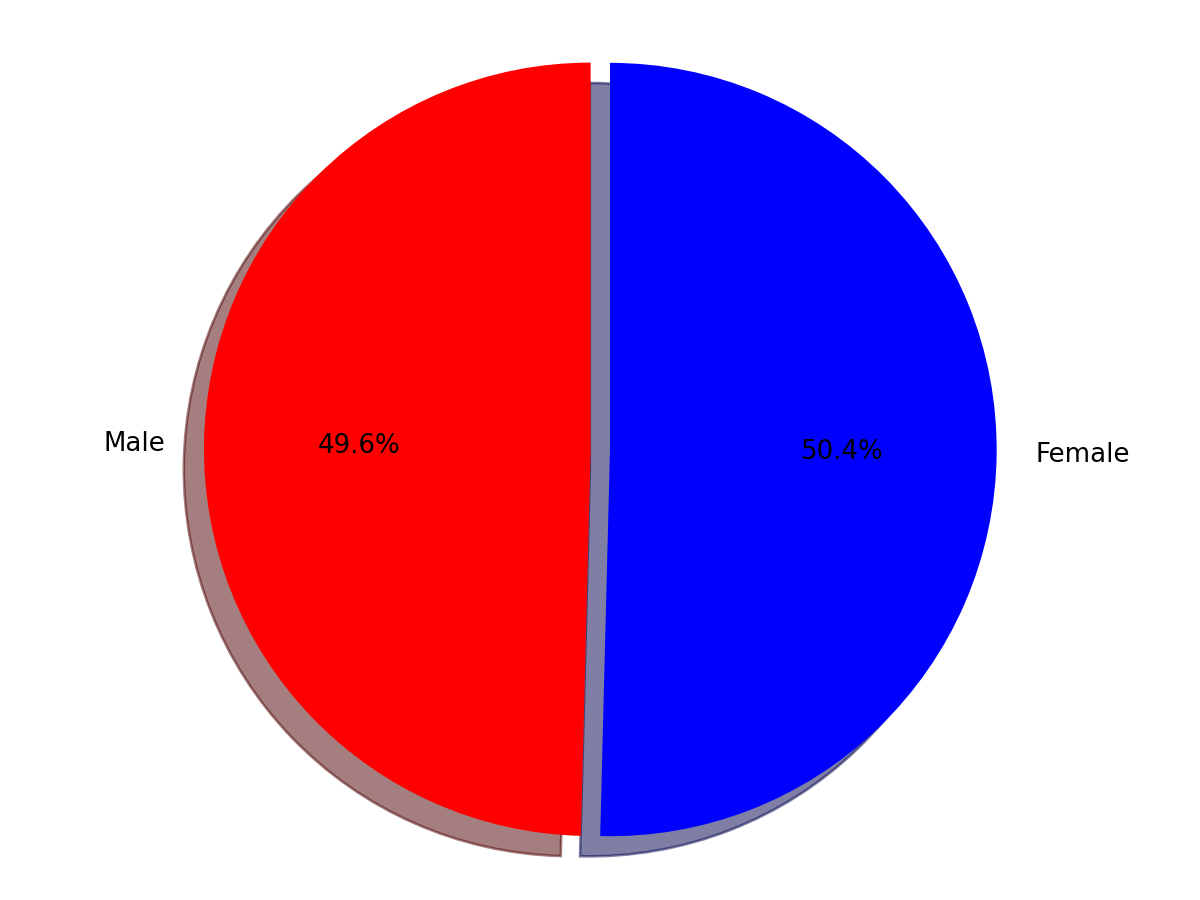

In [339]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = cmousend_rpt_df['Sex'].unique().tolist()
sizes = cmousend_rpt_df.groupby(['Sex'])['Mouse ID'].nunique().tolist()
colors = ['red','blue']
explode = [.05,0]
plt.pie(sizes, labels=labels ,colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90, explode=explode)
plt.axis('equal')
plt.tight_layout()
plt.show()

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
